In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['column_2C_weka.csv']


In [2]:
data = pd.read_csv('../input/column_2C_weka.csv')

In [3]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
data.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [5]:
A = data[data['class'] == 'Abnormal']
N = data[data['class'] == 'Normal']

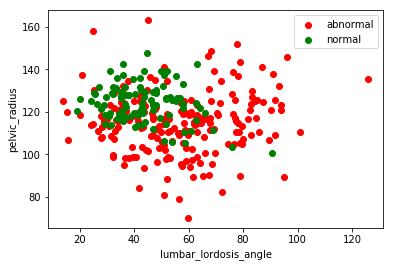

In [6]:
plt.scatter(A.lumbar_lordosis_angle, A['pelvic_radius'], color = 'red', label = 'abnormal')
plt.scatter(N.lumbar_lordosis_angle, N['pelvic_radius'], color = 'green', label = 'normal')
plt.xlabel('lumbar_lordosis_angle')
plt.ylabel('pelvic_radius')
plt.legend()
plt.show()

In [7]:
data['class'] = [1 if i == 'Abnormal' else 0 for i in data['class']]

In [8]:
x_data = data.drop(['class'], axis = 1)
y = data['class'].values

In [9]:
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 19) #n_neighbors = K
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)

In [12]:
prediction

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1])

In [13]:
knn.score(x_test, y_test)

0.8064516129032258

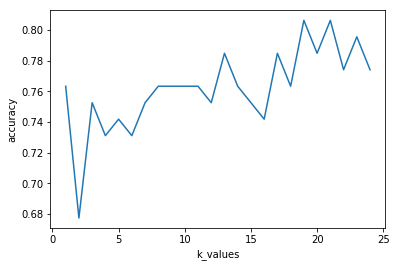

In [14]:
score_list = []
for i in range(1,25):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(x_train, y_train)
    score_list.append(knn2.score(x_test, y_test))
plt.plot(range(1,25), score_list)
plt.xlabel('k_values')
plt.ylabel('accuracy')
plt.show()